In [1]:
import pandas as pd
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
import random

In [2]:
house = pd.read_csv("boston-corrected.csv")
y = house['CMEDV'].values
X = house.loc[:,'CRIM':'LSTAT'].values.T

## 1. CV ridge regression

In [3]:
def Sphere(X):
    p, n = X.shape
    X_sd = np.std(X, axis = 1)
    #identity = np.identity(p)
    column = np.ones(n).reshape((n,1))
    X_bar = np.mean(X, axis = 1).reshape((-1,1))
    X_sphere = np.diag(1/X_sd).dot(X - X_bar.dot(column.T))
    print("The std is: ",X_sd)
    print("The mean is ",X_bar)
    return X_sphere,X_bar, X_sd

def SphereTestSet(X,X_bar, X_sd):
    p, n = X.shape
    column = np.ones(n).reshape((n,1)) 
    return np.diag(1/X_sd).dot(X - X_bar.dot(column.T))

def SolveRidgeRegression(X, y, c):
    p,n = X.shape 
    X0 = np.ones((1,n))
    Xnew = np.vstack((X0,X))
    xy = np.dot(Xnew, y) #(p+1)*1
    xx = np.dot(Xnew, np.transpose(Xnew))
    identity = np.identity(p+1)
    identity[0,0] = 0
    mat = identity * c + xx #(p+1)*(p+1)
    matinv = np.linalg.inv(mat) #(p+1)*(p+1)
    w = np.dot(matinv, xy) 
    return w

def CalculateEffectiveDF(X,w):
    p,n = X.shape 
    xx = np.dot(X, np.transpose(X))
    identity = np.identity(p)
    mat = identity * c + xx 
    matinv = np.linalg.inv(mat) 
    df_mat =  X.T.dot(matinv).dot(X)
    df = np.sum(np.diagonal(df_mat))
    return df

def CalculateMeanSquareError(X, y, w):
    p,n = X.shape 
    y = y.reshape((n,1))
    w = w.reshape((p+1,1))
    X0 = np.ones((1,n))
    Xnew = np.vstack((X0,X))
    error = np.sum((y - Xnew.T.dot(w)).T.dot(y - Xnew.T.dot(w)))/n
    return error


def CrossValidation(X , y, c, folds):
    p,n = X.shape 
    fold_size = [46, 46, 46, 46, 46, 46, 46, 46, 46, 46]
    MSE = []
    df= []
    for k in range(0,folds):
        print(k*46,(k+1)*46)
        X_valid = X[:, k*46 :  (k+1)*46]
        y_valid = y[k*46 :  (k+1)*46]
        #print(X_valid.shape)
        #print(y_valid.shape)
        index = X == X
        index[ :, k*46 :  (k+1)*46] = False
        X_train = X[index].reshape((p,-1))
        
        index  = y == y
        index[k*46 :  (k+1)*46] = False
        y_train = y[index].reshape((-1,1))
        
        
        w_k = SolveRidgeRegression(X_train, y_train, c)
        MSE_k = CalculateMeanSquareError(X_valid, y_valid, w_k)
        MSE.append(MSE_k)
    cv_MSE = np.mean(MSE)
    cv_df = CalculateEffectiveDF(X,w)
    cv_w = SolveRidgeRegression(X, y, c)
    #print(cv_w.shape)
    return cv_MSE, cv_df,cv_w

In [4]:
X_test = X[:,-46:]
y_test = y[-46:]
X_cv = X[:,:-46]
y_cv = y[:-46]

In [5]:
X_cv , X_bar, X_sd = Sphere(X_cv)

The std is:  [8.70370786e+00 2.27755999e+01 6.80179667e+00 2.54412849e-01
 1.14545242e-01 7.04531143e-01 2.78333447e+01 2.09367445e+00
 8.76729482e+00 1.69480025e+02 2.17573683e+00 9.14475402e+01
 7.13913021e+00]
The mean is  [[3.67306980e+00]
 [1.09358696e+01]
 [1.11596739e+01]
 [6.95652174e-02]
 [5.54718913e-01]
 [6.28177391e+00]
 [6.86800000e+01]
 [3.79503196e+00]
 [9.66739130e+00]
 [4.09458696e+02]
 [1.84758696e+01]
 [3.57252848e+02]
 [1.26794783e+01]]


In [6]:
MSE_split = []
df_split = []
for c in np.arange(0, 20, 0.1):   
    w = SolveRidgeRegression(X_cv, y_cv, c)
    MSE_c = CalculateMeanSquareError(SphereTestSet(X_test,X_bar, X_sd), y_test, w)
    MSE_split.append(MSE_c )
    df = CalculateEffectiveDF(X_cv,w)
    df_split.append(df)

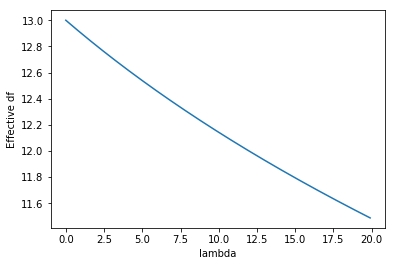

In [7]:
plt.plot(np.arange(0, 20, 0.1), df_split)
plt.xlabel('lambda')
plt.ylabel('Effective df')
plt.show()

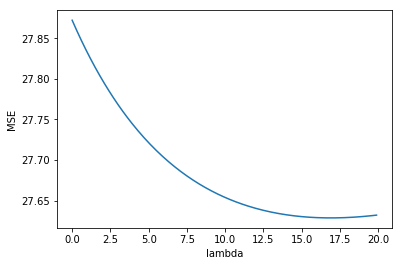

In [8]:
plt.plot(np.arange(0, 20, 0.1),  MSE_split)
plt.xlabel('lambda')
plt.ylabel('MSE')
plt.show()

In [181]:
MSE_cv = []
df_cv = []
w_cv = []
for i in range(0,200):  
    c = i/10
    MSE_c, df_c ,w_c = CrossValidation(X_cv , y_cv, c, 10)
    MSE_cv.append(MSE_c)
    df_cv.append(df_c)
    w_cv.append(w_c)

0 46
46 92
92 138
138 184
184 230
230 276
276 322
322 368
368 414
414 460
0 46
46 92
92 138
138 184
184 230
230 276
276 322
322 368
368 414
414 460
0 46
46 92
92 138
138 184
184 230
230 276
276 322
322 368
368 414
414 460
0 46
46 92
92 138
138 184
184 230
230 276
276 322
322 368
368 414
414 460
0 46
46 92
92 138
138 184
184 230
230 276
276 322
322 368
368 414
414 460
0 46
46 92
92 138
138 184
184 230
230 276
276 322
322 368
368 414
414 460
0 46
46 92
92 138
138 184
184 230
230 276
276 322
322 368
368 414
414 460
0 46
46 92
92 138
138 184
184 230
230 276
276 322
322 368
368 414
414 460
0 46
46 92
92 138
138 184
184 230
230 276
276 322
322 368
368 414
414 460
0 46
46 92
92 138
138 184
184 230
230 276
276 322
322 368
368 414
414 460
0 46
46 92
92 138
138 184
184 230
230 276
276 322
322 368
368 414
414 460
0 46
46 92
92 138
138 184
184 230
230 276
276 322
322 368
368 414
414 460
0 46
46 92
92 138
138 184
184 230
230 276
276 322
322 368
368 414
414 460
0 46
46 92
92 138
138 184
184 230
230 

322 368
368 414
414 460
0 46
46 92
92 138
138 184
184 230
230 276
276 322
322 368
368 414
414 460
0 46
46 92
92 138
138 184
184 230
230 276
276 322
322 368
368 414
414 460
0 46
46 92
92 138
138 184
184 230
230 276
276 322
322 368
368 414
414 460
0 46
46 92
92 138
138 184
184 230
230 276
276 322
322 368
368 414
414 460
0 46
46 92
92 138
138 184
184 230
230 276
276 322
322 368
368 414
414 460
0 46
46 92
92 138
138 184
184 230
230 276
276 322
322 368
368 414
414 460
0 46
46 92
92 138
138 184
184 230
230 276
276 322
322 368
368 414
414 460
0 46
46 92
92 138
138 184
184 230
230 276
276 322
322 368
368 414
414 460
0 46
46 92
92 138
138 184
184 230
230 276
276 322
322 368
368 414
414 460
0 46
46 92
92 138
138 184
184 230
230 276
276 322
322 368
368 414
414 460
0 46
46 92
92 138
138 184
184 230
230 276
276 322
322 368
368 414
414 460
0 46
46 92
92 138
138 184
184 230
230 276
276 322
322 368
368 414
414 460
0 46
46 92
92 138
138 184
184 230
230 276
276 322
322 368
368 414
414 460
0 46
46 92
92 

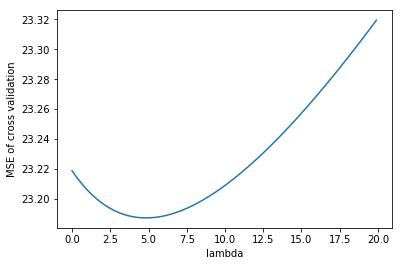

In [182]:
plt.plot(np.arange(0, 20, 0.1),  MSE_cv)
plt.xlabel('lambda')
plt.ylabel('MSE of cross validation')
plt.show()

In [183]:
w_best = w_cv[np.argmin(MSE_cv)]
lambda_best = np.arange(0, 20, 0.1)[np.argmin(MSE_cv)]

In [184]:
print("The best lambda is ",lambda_best)
print("The train MSE of CV-ridge regression is ",min(MSE_cv))

The best lambda is  4.800000000000001
The train MSE of CV-ridge regression is  23.187224484305933


In [185]:
MSE = CalculateMeanSquareError(SphereTestSet(X_test,X_bar, X_sd), y_test, w_best)
print("The test MSE of CV-ridge regression is ", MSE)

The test MSE of CV-ridge regression is  27.725342260413367


In [10]:
w_un = SolveRidgeRegression(X_cv, y_cv, 0)
MSE_un = CalculateMeanSquareError(SphereTestSet(X_test,X_bar, X_sd), y_test, w_un)

In [11]:
MSE_un

27.872154029184163

## 2. Descent methods for regression

## 2.1 Gradient descent

In [186]:
def Sphere(X):
    p, n = X.shape
    X_sd = np.std(X, axis = 1)
    #identity = np.identity(p)
    column = np.ones(n).reshape((n,1))
    X_bar = np.mean(X, axis = 1).reshape((-1,1))
    X_sphere = np.diag(1/X_sd).dot(X - X_bar.dot(column.T))
    print("The std is: ",X_sd)
    print("The mean is ",X_bar)
    return X_sphere,X_bar, X_sd

def Gradient(X, y, w):
    p,n = X.shape 
    X0 = np.ones((1,n))
    Xnew = np.vstack((X0,X))
    y = y.reshape((n,1))
    xy = np.dot(Xnew, y).reshape((p+1,1)) #(p+1)*1
    xx = np.dot(Xnew, np.transpose(Xnew)).reshape((p+1,p+1))
    g =  2/n * (xx.dot(w) - xy)
    #print(g.shape)
    return g

def GradientDescent(X,y,eta,w,it):
    p,n = X.shape 
    X0 = np.ones((1,n))
    Xnew = np.vstack((X0,X))
    #obj = np.mean((y - Xnew.T.dot(w))**2)
    w_update = w 
    w_it = np.zeros(shape = (p+1,it))
    MSE_it = []
    for i in range(it):
        w_update = w - eta * Gradient(X, y, w) 
        w_it[:,i] = w_update.reshape(-1)
        w = w_update
        error = CalculateMeanSquareError(X, y, w)
        MSE_it.append(error)
    return w_it.reshape((p+1,it)) , MSE_it
  
def CalculateMeanSquareError(X, y, w):
    p,n = X.shape 
    y = y.reshape((n,1))
    X0 = np.ones((1,n))
    Xnew = np.vstack((X0,X))
    error = np.sum((y - Xnew.T.dot(w)).T.dot(y - Xnew.T.dot(w)))/n
    return error

def SolveOLS(X,y):
    p,n = X.shape 
    X0 = np.ones((1,n))
    Xnew = np.vstack((X0,X))
    xy = np.dot(Xnew, y) #(p+1)*1
    xx = np.dot(Xnew, np.transpose(Xnew))
    matinv = np.linalg.inv(xx) #(p+1)*(p+1)
    w = np.dot(matinv, xy) 
    return w

In [187]:
X_test = X[:,-46:]
y_test = y[-46:]
X_cv = X[:,:-46]
y_cv = y[:-46]

In [188]:
X_cv , X_bar, X_sd = Sphere(X_cv)

The std is:  [8.70370786e+00 2.27755999e+01 6.80179667e+00 2.54412849e-01
 1.14545242e-01 7.04531143e-01 2.78333447e+01 2.09367445e+00
 8.76729482e+00 1.69480025e+02 2.17573683e+00 9.14475402e+01
 7.13913021e+00]
The mean is  [[3.67306980e+00]
 [1.09358696e+01]
 [1.11596739e+01]
 [6.95652174e-02]
 [5.54718913e-01]
 [6.28177391e+00]
 [6.86800000e+01]
 [3.79503196e+00]
 [9.66739130e+00]
 [4.09458696e+02]
 [1.84758696e+01]
 [3.57252848e+02]
 [1.26794783e+01]]


In [189]:
eta = 0.05
w0 = np.zeros((14,1))
it = 500
w_it,MSE_it = GradientDescent(X_cv, y_cv,eta,w0,it)
w_GD = w_it[:,-1].reshape((14,1))

In [190]:
train_error = MSE_it[-1]
test_error = CalculateMeanSquareError(SphereTestSet(X_test,X_bar, X_sd), y_test, w_it[:,-1].reshape((14,1)))
print("The train MSE of GD regression is ", train_error)
print("The test MSE of GD regression is ", test_error)

The train MSE of GD regression is  20.9387175110335
The test MSE of GD regression is  27.862792712515706


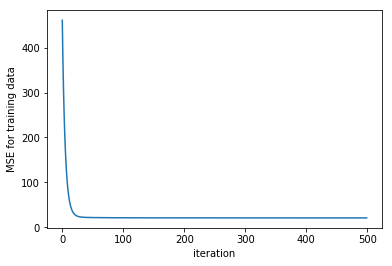

In [191]:
plt.plot(range(it),  MSE_it)
plt.xlabel('iteration')
plt.ylabel('MSE for training data')
plt.show()

In [192]:
w_OLS = SolveOLS(X_cv, y_cv).reshape((14,1))

In [193]:
train_error = CalculateMeanSquareError(X_cv, y_cv,w_OLS)
test_error = CalculateMeanSquareError(SphereTestSet(X_test,X_bar, X_sd), y_test, w_OLS)
print("The train MSE of OLS regression is ", train_error)
print("The test MSE of OLS regression is ", test_error)

The train MSE of OLS regression is  20.93656010148998
The test MSE of OLS regression is  27.872154029184163


## 2.2 Stocastic gradient descent

In [197]:
def Sphere(X):
    p, n = X.shape
    X_sd = np.std(X, axis = 1)
    #identity = np.identity(p)
    column = np.ones(n).reshape((n,1))
    X_bar = np.mean(X, axis = 1).reshape((-1,1))
    X_sphere = np.diag(1/X_sd).dot(X - X_bar.dot(column.T))
    print("The std is: ",X_sd)
    print("The mean is ",X_bar)
    return X_sphere,X_bar, X_sd

def StocasticGradient(X, y, w):
    xy = np.dot(X, y).reshape((-1,1)) #(p+1)*1
    xx = np.dot(X, X.T)
    g =  2 * (xx.dot(w) - xy) 
    return g

def StocasticGradientDescent(X,y,eta,w,it):
    p,n = X.shape 
    X0 = np.ones((1,n))
    Xnew = np.vstack((X0,X))
    w_update = np.copy(w) 
    w_it = np.zeros(shape = (p+1,it))
    MSE_it = []
    for i in range(it):
        for j in range(1,n):
            #rand = random.randint(0,n-1)
            Xrand = Xnew[:,j].reshape((p+1,1))
            yrand = y[j]
            w_update = w - eta * StocasticGradient(Xrand, yrand, w) 
            w = np.copy(w_update) 
        w_it[:,i] = w.reshape(-1)
        error = CalculateMeanSquareError(X, y, w)
        MSE_it.append(error)
    return w_it.reshape((p+1,-1)), MSE_it
  
def CalculateMeanSquareError(X, y, w):
    p,n = X.shape 
    y = y.reshape((n,1))
    X0 = np.ones((1,n))
    Xnew = np.vstack((X0,X))
    error = np.sum((y - Xnew.T.dot(w)).T.dot(y - Xnew.T.dot(w)))/n
    return error

def SolveOLS(X,y):
    p,n = X.shape 
    X0 = np.ones((1,n))
    Xnew = np.vstack((X0,X))
    xy = np.dot(Xnew, y) #(p+1)*1
    xx = np.dot(Xnew, np.transpose(Xnew))
    matinv = np.linalg.inv(xx) #(p+1)*(p+1)
    w = np.dot(matinv, xy) 
    return w

In [200]:
X_test = X[:,-46:]
y_test = y[-46:]
X_cv = X[:,:-46]
y_cv = y[:-46]
X_cv , X_bar, X_sd = Sphere(X_cv)

The std is:  [8.70370786e+00 2.27755999e+01 6.80179667e+00 2.54412849e-01
 1.14545242e-01 7.04531143e-01 2.78333447e+01 2.09367445e+00
 8.76729482e+00 1.69480025e+02 2.17573683e+00 9.14475402e+01
 7.13913021e+00]
The mean is  [[3.67306980e+00]
 [1.09358696e+01]
 [1.11596739e+01]
 [6.95652174e-02]
 [5.54718913e-01]
 [6.28177391e+00]
 [6.86800000e+01]
 [3.79503196e+00]
 [9.66739130e+00]
 [4.09458696e+02]
 [1.84758696e+01]
 [3.57252848e+02]
 [1.26794783e+01]]


In [201]:
w0 = np.zeros((14,1))
eta = 0.0005
it = 500
w_it, MSE_it = StocasticGradientDescent(X_cv, y_cv, eta,w0,it)
w_SGD = w_it[:,-1].reshape((14,1))

In [202]:
train_error = MSE_it[-1]
test_error = CalculateMeanSquareError(SphereTestSet(X_test,X_bar, X_sd), y_test, w_SGD)
print("The train MSE of SGD regression is ", train_error)
print("The test MSE of SGD regression is ", test_error)

The train MSE of SGD regression is  20.968107764254864
The test MSE of SGD regression is  27.89696948228738


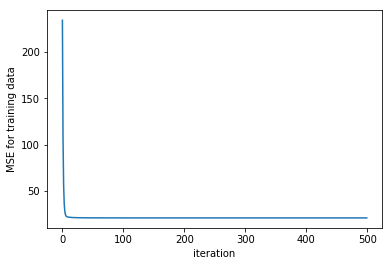

In [203]:
plt.plot(range(it),  MSE_it)
plt.xlabel('iteration')
plt.ylabel('MSE for training data')
plt.show()

In [204]:
w_OLS = SolveOLS(X_cv, y_cv).reshape((14,1))

In [205]:
train_error = CalculateMeanSquareError(X_cv, y_cv,w_OLS)
test_error = CalculateMeanSquareError(SphereTestSet(X_test,X_bar, X_sd), y_test, w_OLS)
print("The train MSE of OLS regression is ", train_error)
print("The test MSE of OLS regression is ", test_error)

The train MSE of OLS regression is  20.93656010148998
The test MSE of OLS regression is  27.872154029184163


## 3. Subgradient

In [127]:
def CalculateThetaTerm(x, y ,theta,n):
    ThetaTerm = np.concatenate([np.zeros([1,n]),1-y*(theta[0:-1].dot(x) + theta[-1])])
    return ThetaTerm

def SubGradientDescent(w,b,x,y,lamda,n):
    #y = y.reshape((-1,1))
    #b = b.reshape(-1)
    #print(b.shape)
    #print(y.shape)
    if ((1.0 - y*(w.dot(x) + b)) > 0):
        u = np.concatenate([-1./n * (y*x  - lamda*w), np.array([-1./n*y])],axis = 0)
    else:
        u = np.concatenate([1./n * lamda*w, np.array([0])],axis = 0)
    return u

In [128]:
nuclear = sio.loadmat('nuclear.mat')

(13, 506) (1, 20000)


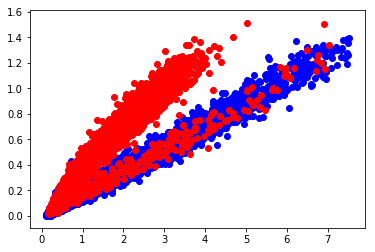

In [129]:
np.random.seed(0)
x = nuclear['x']
y = nuclear['y']
print(X.shape, y.shape)
n = X.shape[1]
negInd = y==-1
posInd = y==1
plt.scatter(x[0,negInd[0,:]], x[1,negInd[0,:]],color='b')
plt.scatter(x[0,posInd[0,:]], x[1,posInd[0,:]],color='r')
plt.figure(1)
plt.show()

In [130]:
np.random.seed(0)
theta = np.array([0,0,0])
lamda = 0.001
it = 40
p, n = x.shape
ThetaTerm = CalculateThetaTerm(x, y ,theta,n)
obj = (1. / n) * np.sum(np.max(ThetaTerm,axis = 0))  + (lamda/2) *(np.linalg.norm(theta[0:-1],2) ** 2 )
obj_plot = np.zeros([it])
for j in range(0,it):
    theta_old = np.copy(theta)
    u = np.array([0,0,0])
    for i in range(0,n):
        u =  u +  SubGradientDescent(theta[0:-1], theta[-1],x[:,i],y[0,i],lamda,n)
    theta = theta - (100./(j+1.)) * u
    ThetaTerm = CalculateThetaTerm(x, y,theta,n)
    new_obj = (1. / n) * np.sum(np.max(ThetaTerm,axis = 0))  + (lamda/2) *(np.linalg.norm(theta[0:-1],2) ** 2 )
    obj_plot[j] = new_obj

In [131]:
obj_plot

array([ 6.19271655, 27.11303529,  1.93720597,  5.83102809,  6.59666615,
        4.66894461,  3.76824199,  4.27923216,  1.97416811,  2.92116653,
        1.48137869,  1.8920723 ,  1.24959808,  1.62608048,  1.22643808,
        1.4085702 ,  1.17869505,  1.1707115 ,  1.0779166 ,  0.94136666,
        1.00169806,  0.77052828,  0.93861051,  0.62870845,  0.83449298,
        0.50583079,  0.65302803,  0.394516  ,  0.42851756,  0.36927603,
        0.37682701,  0.36467276,  0.36776924,  0.35905742,  0.35883833,
        0.35490231,  0.35379278,  0.35161736,  0.35062394,  0.34954643])

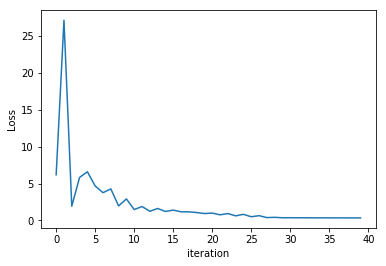

In [132]:
plt.plot(range(it),  obj_plot)
plt.xlabel('iteration')
plt.ylabel('Loss')
plt.show()

In [75]:
np.random.seed(0)
theta = np.array([0,0,0])
p, n = x.shape
ThetaTerm = CalculateThetaTerm(x, y ,theta,n)
obj = (1. / n) * np.sum(np.max(ThetaTerm,axis = 0))  + (lamda/2) *(np.linalg.norm(theta[0:-1],2) ** 2 )
it = 10
obj_plot =[]
for j in range(0,it):
    for i in range(0,n):
        theta_old = np.copy(theta)
        u =  SubGradientDescent(theta[0:-1], theta[-1],x[:,i],y[0,i],lamda,n)
        theta = theta - (100./(j+1.)) * u
        ThetaTerm = np.concatenate([np.zeros([1,n]),1-y*(theta[0:-1].dot(x) + theta[-1])])
        new_obj = (1. / n) * np.sum(np.max(ThetaTerm,axis = 0))  + (lamda/2) *(np.linalg.norm(theta[0:-1],2) ** 2 )
        obj_plot.append(new_obj)

In [85]:
obj_plot

[0.9996423834088352,
 0.998634661732249,
 1.000215746870564,
 0.9989472314543415,
 0.9978578734910462,
 0.9982989906586864,
 0.9973734288936899,
 0.9969404942722523,
 0.9971202001094351,
 0.9966627812062505,
 0.9961978917222856,
 0.9963124070279997,
 0.9953907786883798,
 0.994695949213623,
 0.9951277038610976,
 0.9953723376412131,
 0.9951654545172047,
 0.9953001425000769,
 0.9954542315788942,
 0.9957003038114492,
 0.9949957813809237,
 0.9946701560829415,
 0.9956600274670313,
 0.9957334842918718,
 0.9953614346802433,
 0.995764820371781,
 0.9959490909058804,
 0.9960672681039632,
 0.9961962377674234,
 0.9963670244971014,
 0.996874417415625,
 0.9983262489489241,
 0.9976990984174795,
 0.9971381144369224,
 0.9977840493874657,
 0.9979666214640722,
 0.9969207049583994,
 0.9957811538277404,
 0.9939177224909307,
 0.9948576730950398,
 0.9951438784606602,
 0.9965674296234212,
 0.9956641625327127,
 0.9959719279832552,
 0.9962029227554451,
 0.9963922250906814,
 0.9969135701945907,
 0.996283856232250

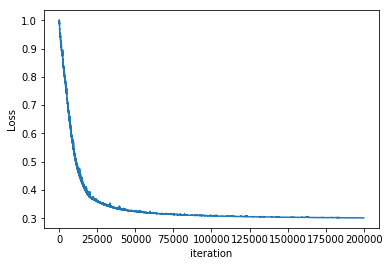

In [89]:
plt.plot(range(it*n),  obj_plot)
plt.xlabel('iteration')
plt.ylabel('Loss')
plt.show()

## 4 Coordinate descent for ridge

In [206]:
def Sphere(X):
    p, n = X.shape
    X_sd = np.std(X, axis = 1)
    #identity = np.identity(p)
    column = np.ones(n).reshape((n,1))
    X_bar = np.mean(X, axis = 1).reshape((-1,1))
    X_sphere = np.diag(1/X_sd).dot(X - X_bar.dot(column.T))
    print("The std is: ",X_sd)
    print("The mean is ",X_bar)
    return X_sphere,X_bar, X_sd

def SphereTestSet(X,X_bar, X_sd):
    p, n = X.shape
    column = np.ones(n).reshape((n,1)) 
    return np.diag(1/X_sd).dot(X - X_bar.dot(column.T))

def CoordinateGradient(X, y, w,i):
    p,n = X.shape
    X0 = np.ones((1,n))
    Xnew = np.vstack((X0,X))
    Xi = Xnew[i,:].reshape((1,n))
    w0 = np.mean(y)
    w[0] = w0
    w_i = np.copy(w)
    w_i[i] = 0
    column = np.ones((n,1))
    y_wi = Xnew.T.dot(w_i).reshape((n,1)) 
    y = y.reshape((n,1))
    #print(Xi.shape, y.shape, y_wi.shape)
    a = 2 * Xi.dot(Xi.T).reshape(-1)
    c = 2 * Xi.dot(y - y_wi).reshape(-1)
    #print(a.shape, c.shape)
    return a , c

def CoordinateDescent(X,y,w,it,lamda):
    p,n = X.shape 
    w_update = w 
    w_it = np.zeros(shape = (p+1,it))
    MSE_it = []
    for it in range(it):
        for i in range(1,p+1):
            a,c = CoordinateGradient(X, y, w, i)
            w_update[i] = c/(a+2.*lamda)
            w = w_update
        #print(w.shape)
        w_it[:,it] = w.reshape(-1)
        error = CalculateMeanSquareError(X, y, w)
        MSE_it.append(error)
        #print(w_it.shape)
    return w_it, MSE_it
  
def CalculateMeanSquareError(X, y, w):
    p,n = X.shape 
    y = y.reshape((n,1))
    X0 = np.ones((1,n))
    Xnew = np.vstack((X0,X))
    error = np.sum((y - Xnew.T.dot(w)).T.dot(y - Xnew.T.dot(w)))/n
    return error

In [207]:
X_test = X[:,-46:]
y_test = y[-46:]
X_cv = X[:,:-46]
y_cv = y[:-46]
X_cv , X_bar, X_sd = Sphere(X_cv)

The std is:  [8.70370786e+00 2.27755999e+01 6.80179667e+00 2.54412849e-01
 1.14545242e-01 7.04531143e-01 2.78333447e+01 2.09367445e+00
 8.76729482e+00 1.69480025e+02 2.17573683e+00 9.14475402e+01
 7.13913021e+00]
The mean is  [[3.67306980e+00]
 [1.09358696e+01]
 [1.11596739e+01]
 [6.95652174e-02]
 [5.54718913e-01]
 [6.28177391e+00]
 [6.86800000e+01]
 [3.79503196e+00]
 [9.66739130e+00]
 [4.09458696e+02]
 [1.84758696e+01]
 [3.57252848e+02]
 [1.26794783e+01]]


In [210]:
w0 = np.ones((14,1))
it = 50
lamda = 100
w_it, MSE_it = CoordinateDescent(X_cv,y_cv,w0,it,lamda)

In [211]:
train_error = MSE_it[-1]
test_error = CalculateMeanSquareError(SphereTestSet(X_test,X_bar, X_sd), y_test, w_it[:,-1].reshape((14,1)))
print("The train MSE of CD-ridge regression is ", train_error)
print("The test MSE of CD-ridge regression is ", test_error)

The train MSE of CD-ridge regression is  22.905027517997446
The test MSE of CD-ridge regression is  28.48143822980078


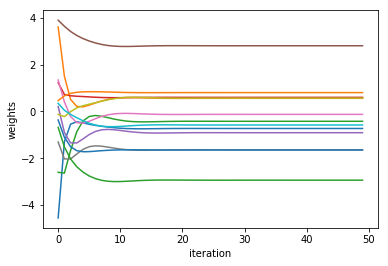

In [212]:
for i in range(1,14):
    wi = w_it[i,:]
    plt.plot(range(it),  wi)
    plt.xlabel('iteration')
    plt.ylabel('weights')
plt.show()

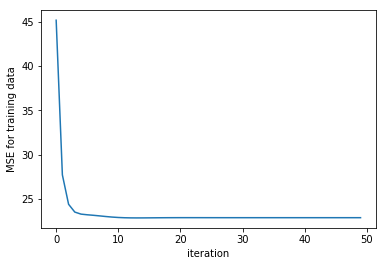

In [213]:
plt.plot(range(it),  MSE_it)
plt.xlabel('iteration')
plt.ylabel('MSE for training data')
plt.show()

## 5 Coordinate descent for lasso

In [262]:
def Sphere(X):
    p, n = X.shape
    X_sd = np.std(X, axis = 1)
    #identity = np.identity(p)
    column = np.ones(n).reshape((n,1))
    X_bar = np.mean(X, axis = 1).reshape((-1,1))
    X_sphere = np.diag(1/X_sd).dot(X - X_bar.dot(column.T))
    print("The std is: ",X_sd)
    print("The mean is ",X_bar)
    return X_sphere,X_bar, X_sd

def SphereTestSet(X,X_bar, X_sd):
    p, n = X.shape
    column = np.ones(n).reshape((n,1)) 
    return np.diag(1/X_sd).dot(X - X_bar.dot(column.T))

def CoordinateGradient(X, y, w,i):
    p,n = X.shape
    X0 = np.ones((1,n))
    Xnew = np.vstack((X0,X))
    Xi = Xnew[i,:].reshape((1,n))
    w0 = np.mean(y)
    w[0] = w0
    w_i = np.copy(w)
    w_i[i] = 0
    y_wi = Xnew.T.dot(w_i).reshape((n,1)) 
    y = y.reshape((n,1))
    #print(Xi.shape, y.shape, y_wi.shape)
    a = 2 * Xi.dot(Xi.T).reshape(-1)
    c = 2 * Xi.dot(y - y_wi).reshape(-1)
    #print(a.shape, c.shape)
    return a , c

def CoordinateDescent(X,y,w,it,lamda):
    p,n = X.shape 
    w_update = w 
    w_it = np.zeros(shape = (p+1,it))
    MSE_it = []
    for it in range(it):
        for i in range(1,p+1):
            a,c = CoordinateGradient(X, y, w, i)
            if(c>lamda):
                w_update[i] = (c-lamda)/a
            elif(c<-lamda):
                w_update[i] = (c+lamda)/a
            else:
                w_update[i] = 0        
            w = w_update
        #print(w.shape)
        w_it[:,it] = w.reshape(-1)
        error = CalculateMeanSquareError(X, y, w)
        MSE_it.append(error)
        #print(w_it.shape)
    return w_it, MSE_it
  
def CalculateMeanSquareError(X, y, w):
    p,n = X.shape 
    y = y.reshape((n,1))
    X0 = np.ones((1,n))
    Xnew = np.vstack((X0,X))
    error = np.sum((y - Xnew.T.dot(w)).T.dot(y - Xnew.T.dot(w)))/n
    return error


def CrossValidationCoordinateDescent(X , y, folds ,w,it):
    p,n = X.shape 
    MSE_it = []
    w_it = np.zeros(shape = (p+1,1000))
    for i in range(1000):
        lamda = i/10.
        MSE = []
        for k in range(0,folds):
            X_valid = X[:, k*46 :  (k+1)*46].reshape((p,-1))
            y_valid = y[k*46 :  (k+1)*46].reshape((-1,1))
            index = X == X
            index[ :, k*46 :  (k+1)*46] = False
            X_train = X[index].reshape((p,-1))
            index  = y == y
            index[k*46 :  (k+1)*46] = False
            y_train = y[index].reshape((-1,1))

            w_kit, MSE_kit = CoordinateDescent(X_train,y_train,w,it,lamda)
            w_k = w_kit[:,-1].reshape((14,1))
            MSE_k = CalculateMeanSquareError(X_valid, y_valid, w_k)
            MSE.append(MSE_k)
        cv_MSE = np.mean(MSE)
    #cv_df = CalculateEffectiveDF(X,w)
        cv_wit, cv_MSEit = CoordinateDescent(X,y,w,it,lamda)
        w_it[:,i] = cv_wit[:,-1].reshape(-1)
        MSE_it.append(cv_MSE)
    return w_it, MSE_it

In [263]:
X_test = X[:,-46:]
y_test = y[-46:]
X_cv = X[:,:-46]
y_cv = y[:-46]
X_cv , X_bar, X_sd = Sphere(X_cv)

The std is:  [8.70370786e+00 2.27755999e+01 6.80179667e+00 2.54412849e-01
 1.14545242e-01 7.04531143e-01 2.78333447e+01 2.09367445e+00
 8.76729482e+00 1.69480025e+02 2.17573683e+00 9.14475402e+01
 7.13913021e+00]
The mean is  [[3.67306980e+00]
 [1.09358696e+01]
 [1.11596739e+01]
 [6.95652174e-02]
 [5.54718913e-01]
 [6.28177391e+00]
 [6.86800000e+01]
 [3.79503196e+00]
 [9.66739130e+00]
 [4.09458696e+02]
 [1.84758696e+01]
 [3.57252848e+02]
 [1.26794783e+01]]


In [264]:
w0 = np.ones((14,1))
it = 50
lamda = 100
w_it, MSE_it = CoordinateDescent(X_cv,y_cv,w0,it,lamda)

In [261]:
w_it[:,-1].reshape((14,1))

array([[22.51130435],
       [-0.7454471 ],
       [ 0.66370314],
       [-0.02266867],
       [ 0.5040217 ],
       [-1.60151903],
       [ 2.92563162],
       [ 0.        ],
       [-2.45228241],
       [ 0.95501484],
       [-0.67602484],
       [-1.90636359],
       [ 0.79348814],
       [-3.70742375]])

In [255]:
train_error = MSE_it[-1]
test_error = CalculateMeanSquareError(SphereTestSet(X_test,X_bar, X_sd), y_test, w_it[:,-1].reshape((14,1)))
print("The train MSE of CD-lasso regression is ", train_error)
print("The test MSE of CD-lasso regression is ", test_error)

The train MSE of CD-lasso regression is  21.503260257262333
The test MSE of CD-lasso regression is  28.046625103970136


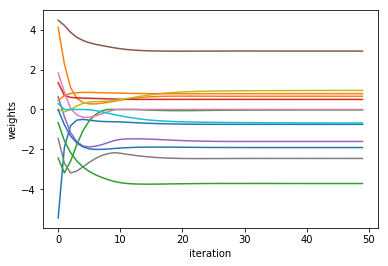

In [256]:
for i in range(1,14):
    wi = w_it[i,:]
    plt.plot(range(it),  wi)
    plt.xlabel('iteration')
    plt.ylabel('weights')
plt.show()

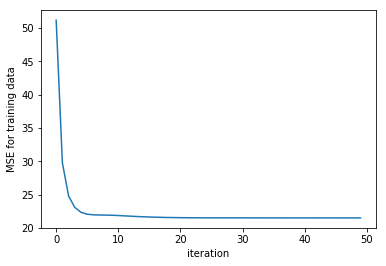

In [257]:
plt.plot(range(it),  MSE_it)
plt.xlabel('iteration')
plt.ylabel('MSE for training data')
plt.show()

In [265]:
w0 = np.ones((14,1))
it = 50
w_it, MSE_it = CrossValidationCoordinateDescent(X_cv,y_cv,10,w0,it)

In [247]:
w_it[:,-1]

array([ 2.25113043e+01, -7.46040070e-01,  6.64296977e-01, -2.19660136e-02,
        5.03996557e-01, -1.60238320e+00,  2.92535646e+00,  0.00000000e+00,
       -2.45317080e+00,  9.58431165e-01, -6.79019201e-01, -1.90664476e+00,
        7.93614092e-01, -3.70745185e+00])

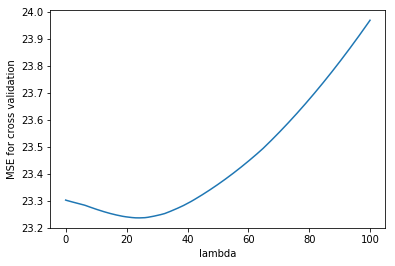

In [267]:
lambda_list = np.arange(0,100,0.1)
plt.plot(lambda_list,  MSE_it)
plt.xlabel('lambda')
plt.ylabel('MSE for cross validation')
plt.show()

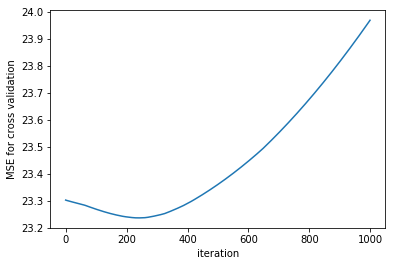

In [268]:
plt.plot(range(1000),  MSE_it)
plt.xlabel('iteration')
plt.ylabel('MSE for cross validation')
plt.show()

In [269]:
best_lamda = range(1000)[np.argmin(MSE_it)]/10
print("The best lambda is ", best_lamda)

The best lambda is  23.7
